In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

# Define paths
base_dir = '/content/drive/MyDrive/Machine_Learning_Final_Project/Splitted_Data'  # Change this to a directory within your Google Drive
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validate')
test_dir = os.path.join(base_dir, 'test')

# List of classes
classes = ['Healthy', 'Brain_Tumor']

# Function to count images
def count_images(directory, classes):
    counts = {}
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        if os.path.exists(class_dir):
            counts[class_name] = len(os.listdir(class_dir))
        else:
            counts[class_name] = 0
    return counts

# Count the number of images in the training, validation, and unseen sets
train_counts = count_images(train_dir, classes)
validation_counts = count_images(validation_dir, classes)
test_counts = count_images(test_dir, classes)

print("Training set counts:")
for class_name, count in train_counts.items():
    print(f"{class_name}: {count} images")

print("\nValidation set counts:")
for class_name, count in validation_counts.items():
    print(f"{class_name}: {count} images")

print("\nUnseen set counts:")
for class_name, count in test_counts.items():
    print(f"{class_name}: {count} images")

Training set counts:
Healthy: 1669 images
Brain_Tumor: 2010 images

Validation set counts:
Healthy: 208 images
Brain_Tumor: 251 images

Unseen set counts:
Healthy: 210 images
Brain_Tumor: 252 images


In [ ]:
# Epoch = 25

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Load the pre-trained DenseNet121 model without the top layer
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
num_classes = train_generator.num_classes  # Ensure this matches the number of classes in your dataset
predictions = Dense(num_classes, activation='softmax')(x)

# Combine base model with custom layers
model_25 = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_25.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist_25 = model_25.fit(
    train_generator,
    epochs=25,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Final evaluation on validation data
final_val_loss, final_val_accuracy = model_25.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Final validation accuracy: {final_val_accuracy:.4f}")
print(f"Final validation loss: {final_val_loss:.4f}")

Found 3679 images belonging to 2 classes.
Found 459 images belonging to 2 classes.
Found 462 images belonging to 2 classes.
Epoch 1/25
115/115 [==============================] - 278s 2s/step - loss: 0.3977 - accuracy: 0.8418 - val_loss: 0.2038 - val_accuracy: 0.9216
Epoch 2/25
115/115 [==============================] - 43s 374ms/step - loss: 0.2623 - accuracy: 0.8905 - val_loss: 0.2066 - val_accuracy: 0.8998
Epoch 3/25
115/115 [==============================] - 41s 356ms/step - loss: 0.2181 - accuracy: 0.9114 - val_loss: 0.1456 - val_accuracy: 0.9499
Epoch 4/25
115/115 [==============================] - 41s 360ms/step - loss: 0.1850 - accuracy: 0.9326 - val_loss: 0.2757 - val_accuracy: 0.8867
Epoch 5/25
115/115 [==============================] - 41s 353ms/step - loss: 0.1875 - accuracy: 0.9266 - val_loss: 0.1330 - val_accuracy: 0.9368
Epoch 6/25
115/115 [==============================] - 42s 365ms/step - loss: 0.1620 - accuracy: 0.9386 - val_loss: 0.1198 - val_accuracy: 0.9521
Epoch 7/

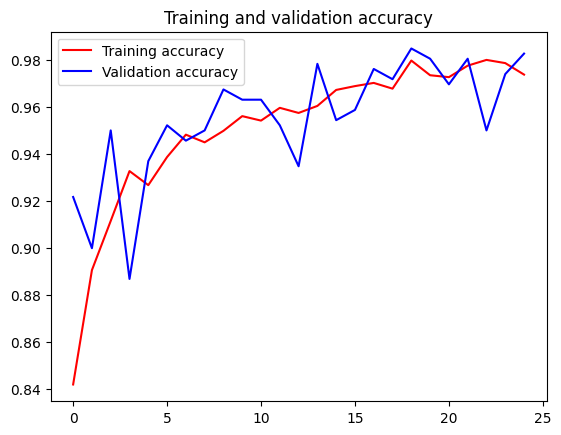

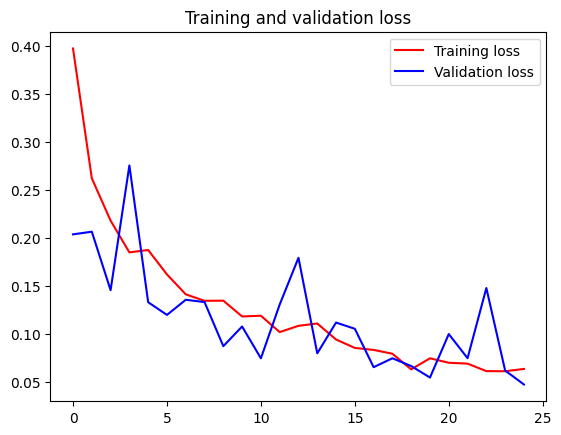

14/14 [==============================] - 3s 182ms/step - loss: 0.0467 - accuracy: 0.9821
Final validation accuracy: 0.9821
Final validation loss: 0.0467


In [ ]:
# Evaluate the model
acc = hist_25.history['accuracy']
val_acc = hist_25.history['val_accuracy']
loss = hist_25.history['loss']
val_loss = hist_25.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Final evaluation on validation data
final_loss, final_accuracy = model_25.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Final validation accuracy: {final_accuracy:.4f}")
print(f"Final validation loss: {final_loss:.4f}")

In [ ]:
# Evaluation on test data (unseen data)
final_test_loss, final_test_accuracy = model_25.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Final test accuracy: {final_test_accuracy:.4f}")
print(f"Final test loss: {final_test_loss:.4f}")

14/14 [==============================] - 148s 11s/step - loss: 0.0818 - accuracy: 0.9665
Final test accuracy: 0.9665
Final test loss: 0.0818


15/15 [==============================] - 6s 303ms/step
Classification Report
              precision    recall  f1-score   support

 Brain_Tumor       0.97      0.96      0.97       252
     Healthy       0.96      0.97      0.96       210

    accuracy                           0.97       462
   macro avg       0.96      0.97      0.97       462
weighted avg       0.97      0.97      0.97       462

Confusion Matrix
[[243   9]
 [  7 203]]


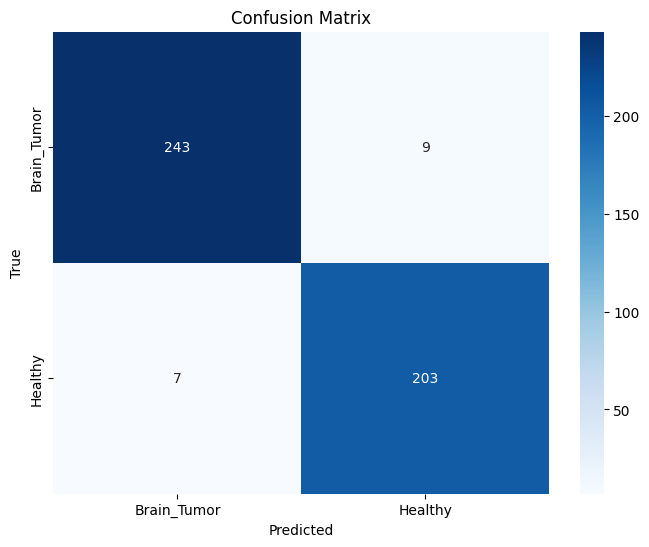

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Predict on test data
test_generator.reset()
Y_pred = model_25.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Classification report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion matrix
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the model in SavedModel format
drive_model_path = '/content/drive/MyDrive/densenet_model_ML_25.h5'
model_25.save(drive_model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Epoch 50

In [ ]:
# Load the pre-trained DenseNet121 model without the top layer
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
num_classes = train_generator.num_classes  # Ensure this matches the number of classes in your dataset
predictions = Dense(num_classes, activation='softmax')(x)

# Combine base model with custom layers
model_50 = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_50.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist_50 = model_50.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Final evaluation on validation data
final_val_loss, final_val_accuracy = model_50.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Final validation accuracy: {final_val_accuracy:.4f}")
print(f"Final validation loss: {final_val_loss:.4f}")

Epoch 1/50
115/115 [==============================] - 68s 523ms/step - loss: 0.5326 - accuracy: 0.8016 - val_loss: 0.2598 - val_accuracy: 0.8867
Epoch 2/50
115/115 [==============================] - 57s 500ms/step - loss: 0.2477 - accuracy: 0.8954 - val_loss: 0.1750 - val_accuracy: 0.9216
Epoch 3/50
115/115 [==============================] - 51s 447ms/step - loss: 0.2066 - accuracy: 0.9195 - val_loss: 0.2373 - val_accuracy: 0.8998
Epoch 4/50
115/115 [==============================] - 63s 548ms/step - loss: 0.2047 - accuracy: 0.9157 - val_loss: 0.1438 - val_accuracy: 0.9368
Epoch 5/50
115/115 [==============================] - 62s 545ms/step - loss: 0.1857 - accuracy: 0.9282 - val_loss: 0.1335 - val_accuracy: 0.9477
Epoch 6/50
115/115 [==============================] - 72s 621ms/step - loss: 0.1533 - accuracy: 0.9418 - val_loss: 0.1269 - val_accuracy: 0.9412
Epoch 7/50
115/115 [==============================] - 58s 507ms/step - loss: 0.1438 - accuracy: 0.9451 - val_loss: 0.1178 - val_ac

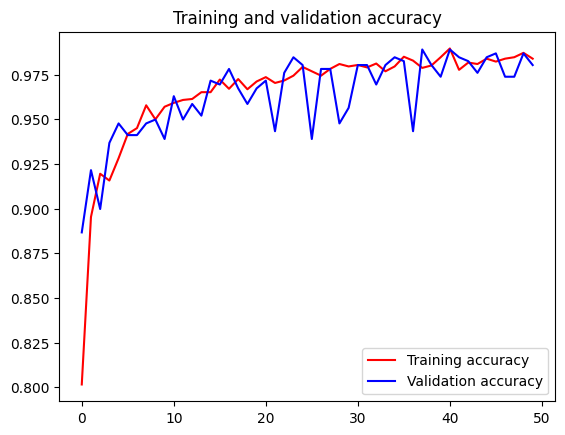

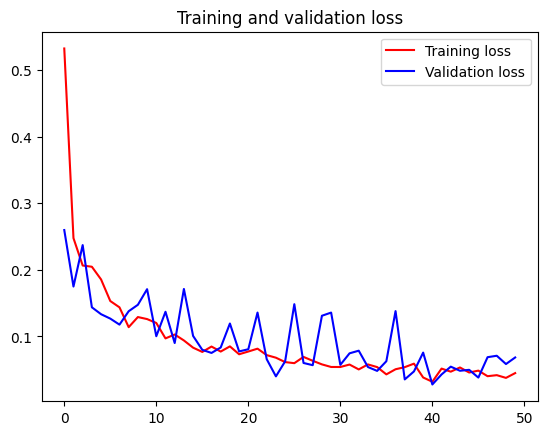

14/14 [==============================] - 3s 175ms/step - loss: 0.0702 - accuracy: 0.9799
Final validation accuracy: 0.9799
Final validation loss: 0.0702


In [ ]:
# Evaluate the model
acc = hist_50.history['accuracy']
val_acc = hist_50.history['val_accuracy']
loss = hist_50.history['loss']
val_loss = hist_50.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Final evaluation on validation data
final_loss, final_accuracy = model_50.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Final validation accuracy: {final_accuracy:.4f}")
print(f"Final validation loss: {final_loss:.4f}")

In [ ]:
# Evaluation on test data (unseen data)
final_test_loss, final_test_accuracy = model_50.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Final test accuracy: {final_test_accuracy:.4f}")
print(f"Final test loss: {final_test_loss:.4f}")

14/14 [==============================] - 2s 141ms/step - loss: 0.0852 - accuracy: 0.9754
Final test accuracy: 0.9754
Final test loss: 0.0852


15/15 [==============================] - 4s 135ms/step
Classification Report
              precision    recall  f1-score   support

 Brain_Tumor       0.99      0.96      0.98       252
     Healthy       0.96      0.99      0.97       210

    accuracy                           0.97       462
   macro avg       0.97      0.98      0.97       462
weighted avg       0.97      0.97      0.97       462

Confusion Matrix
[[243   9]
 [  3 207]]


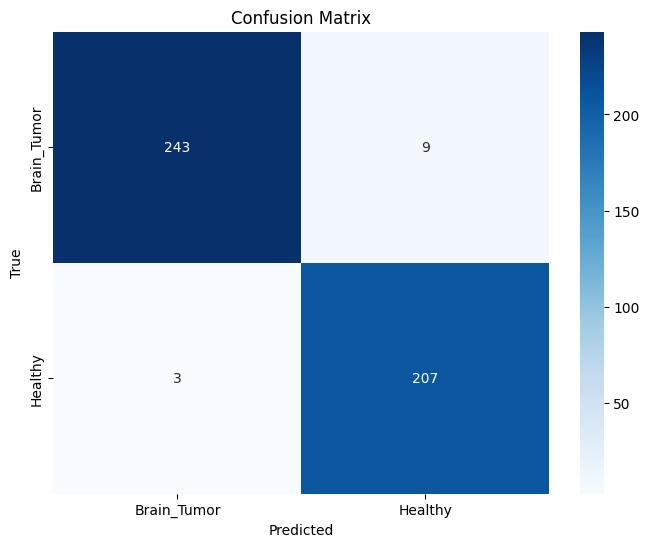

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Predict on test data
test_generator.reset()
Y_pred = model_50.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Classification report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion matrix
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the model in SavedModel format
drive_model_path = '/content/drive/MyDrive/densenet_model_ML_50.h5'
model_25.save(drive_model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Epoch 50 with lr

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Load the pre-trained DenseNet121 model without the top layer
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
num_classes = train_generator.num_classes  # Ensure this matches the number of classes in your dataset
predictions = Dense(num_classes, activation='softmax')(x)

# Combine base model with custom layers
model_50_lr = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_50_lr.compile(optimizer=Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist_50_lr = model_50_lr.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Final evaluation on validation data
final_val_loss, final_val_accuracy = model_50_lr.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Final validation accuracy: {final_val_accuracy:.4f}")
print(f"Final validation loss: {final_val_loss:.4f}")

Found 3679 images belonging to 2 classes.
Found 459 images belonging to 2 classes.
Found 462 images belonging to 2 classes.
29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/50
115/115 [==============================] - 706s 6s/step - loss: 0.4881 - accuracy: 0.7779 - val_loss: 0.2739 - val_accuracy: 0.8845
Epoch 2/50
115/115 [==============================] - 354s 3s/step - loss: 0.2970 - accuracy: 0.8812 - val_loss: 0.2277 - val_accuracy: 0.9041
Epoch 3/50
115/115 [==============================] - 353s 3s/step - loss: 0.2550 - accuracy: 0.9000 - val_loss: 0.2156 - val_accuracy: 0.9107
Epoch 4/50
115/115 [==============================] - 349s 3s/step - loss: 0.2453 - accuracy: 0.9065 - val_loss: 0.2013 - val_accuracy: 0.9194
Epoch 5/50
115/115 [==============================] - 353s 3s/step - loss: 0.2110 - accuracy: 0.9176 - val_loss: 0.1541 - val_accuracy: 0.9455
Epoch 6/50
115/115 [==============================] - 351s 3s/step - loss: 0.1900 - accuracy: 0.

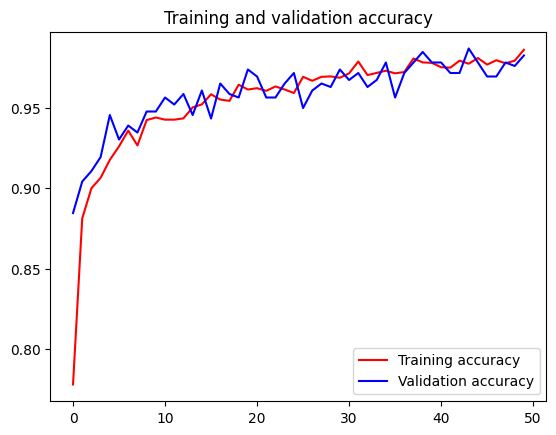

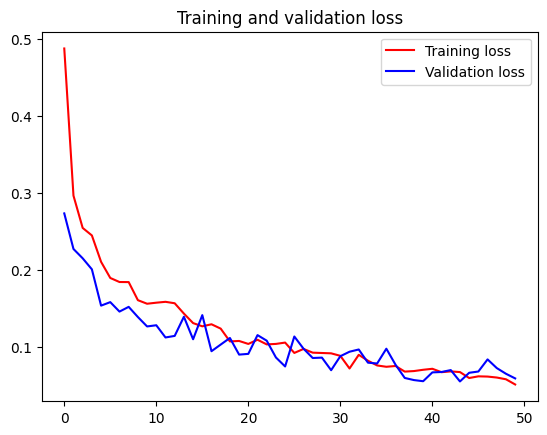

14/14 [==============================] - 36s 3s/step - loss: 0.0609 - accuracy: 0.9821
Final validation accuracy: 0.9821
Final validation loss: 0.0609


In [6]:
# Evaluate the model
acc = hist_50_lr.history['accuracy']
val_acc = hist_50_lr.history['val_accuracy']
loss = hist_50_lr.history['loss']
val_loss = hist_50_lr.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Final evaluation on validation data
final_loss, final_accuracy = model_50_lr.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Final validation accuracy: {final_accuracy:.4f}")
print(f"Final validation loss: {final_loss:.4f}")

In [7]:
# Evaluation on test data (unseen data)
final_test_loss, final_test_accuracy = model_50_lr.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Final test accuracy: {final_test_accuracy:.4f}")
print(f"Final test loss: {final_test_loss:.4f}")

14/14 [==============================] - 112s 8s/step - loss: 0.0878 - accuracy: 0.9688
Final test accuracy: 0.9688
Final test loss: 0.0878


15/15 [==============================] - 59s 4s/step
Classification Report
              precision    recall  f1-score   support

 Brain_Tumor       0.98      0.96      0.97       252
     Healthy       0.95      0.98      0.96       210

    accuracy                           0.97       462
   macro avg       0.97      0.97      0.97       462
weighted avg       0.97      0.97      0.97       462

Confusion Matrix
[[241  11]
 [  4 206]]


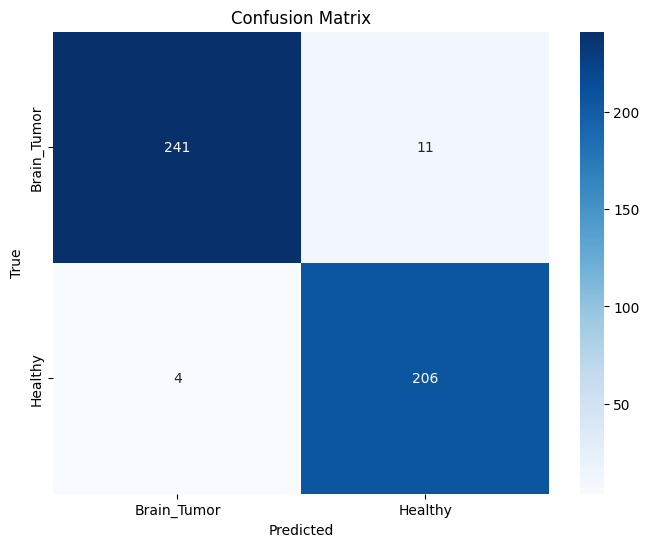

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Predict on test data
test_generator.reset()
Y_pred = model_50_lr.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Classification report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion matrix
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Save the model in SavedModel format
drive_model_path = '/content/drive/MyDrive/densenet_model_ML_50_lr.h5'
model_50_lr.save(drive_model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
